#### Práctica 1

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [90]:
estatura = pd.read_excel('Estaturas.xlsx', 'normales')
estatura['estatura_converted'] = estatura['Estatura(metros)']/10
estatura['edad_converted'] = estatura['Edad(años)']/100
estatura.head(5)

,Estatura(metros),Edad(años),estatura_converted,edad_converted
0,1.77,26,0.177,0.26
1,1.74,31,0.174,0.31
2,1.72,24,0.172,0.24
3,1.78,34,0.178,0.34
4,1.65,32,0.165,0.32


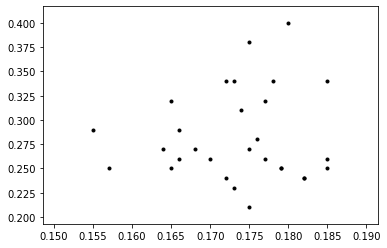

In [89]:
plt.scatter(estatura['estatura_converted'], estatura['edad_converted'], marker='.', color="black")
plt.show()

In [61]:
k = 3
centroides = []
for i in range(k):
    centroides.append([np.random.uniform(0.16, 0.185), np.random.uniform(0.2, 0.4)])

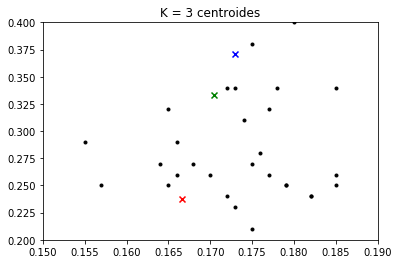

In [79]:
plt.scatter(estatura['estatura_converted'], estatura['edad_converted'], marker='.', color='black')
color_map = {1: 'r', 2: 'g', 3: 'b'}

for i in range(0,len(centroides)):
    plt.scatter(centroides[i][0], centroides[i][1], marker='x', color=color_map[i+1])
    
plt.title('K = 3 centroides')
plt.xlim(0.15, 0.19)
plt.ylim(0.20, 0.4)
plt.show()

In [69]:
for i in range(0,len(centroides)):
    estatura['distancia'] = np.sqrt((estatura['estatura_converted'] - centroides[i][0]) ** 2 + (estatura['edad_converted'] - centroides[i][1]) ** 2 )
    

In [85]:
c = ['distancia_{}'.format(i) for i in centroides]

In [86]:
c

['distancia_[0.16663937749384589, 0.23753782839845758]',
 'distancia_[0.17047619683705903, 0.3331997801915044]',
 'distancia_[0.17293529500569188, 0.3708985037787603]']

In [ ]:
estatura['distancia']

In [ ]:
estatura['distancia'.format(2)],

In [ ]:
def asignacion(df, centroids):
    for i in centroids.keys():
        # sqrt((x1 - c1)^2 - (x2 - c2)^2)
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x1'] - centroids[i][0]) ** 2
                + (df['x2'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df


In [5]:
for i in range(k):
    dse

{1: [26, 16], 2: [68, 42], 3: [55, 76]}

In [ ]:
estatura = pd.read_excel('Estaturas.xlsx', 'valtest(normales)')
estatura

In [ ]:
estatura = pd.read_excel('Estaturas.xlsx', 'anomalias', dtype={'Estatura':float, 'Edad':float})
estatura